<a href="https://colab.research.google.com/github/sandhya111205/principle-of-datascience/blob/main/GuassianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/principle of datascience/ datasets/suv_data.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [10]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n',cm)

Confusion Matrix : 
 [[65  3]
 [ 7 25]]


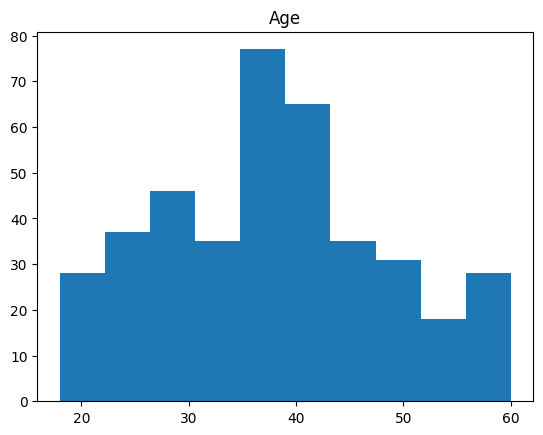

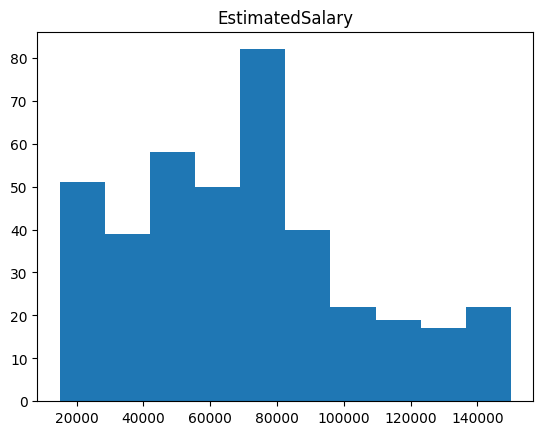

In [13]:
#histogram for training dataset
import matplotlib.pyplot as plt
plt.title("Age")
plt.hist(dataset.Age)
plt.show()
plt.title("EstimatedSalary")
plt.hist(dataset.EstimatedSalary)
plt.show()

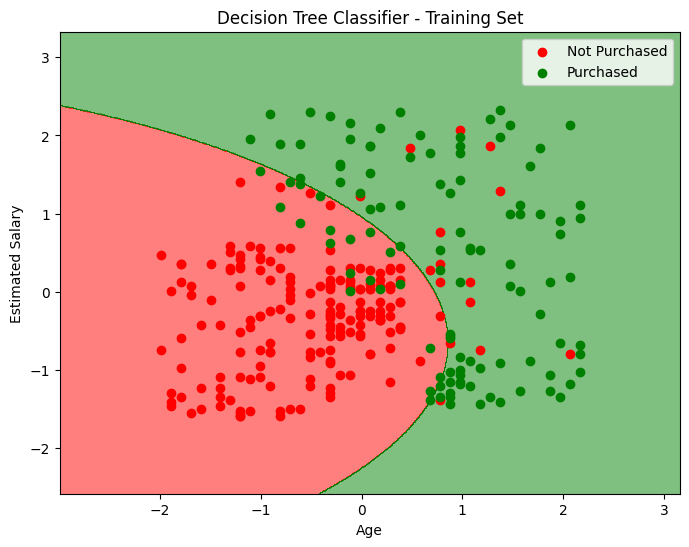

In [14]:

# Visualizing the Training set results
from matplotlib.colors import ListedColormap

# Create a meshgrid to plot the decision boundary
X1, X2 = np.meshgrid(np.arange(start=x_train[:, 0].min() - 1, stop=x_train[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_train[:, 1].min() - 1, stop=x_train[:, 1].max() + 1, step=0.01))

# Use the classifier to predict the class labels for each point in the meshgrid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Create a color map for the plot
cmap = ListedColormap(('red', 'green'))

# Plot the training set data points
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.5, cmap=cmap)
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='red', label='Not Purchased')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='green', label='Purchased')
plt.title('Decision Tree Classifier - Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



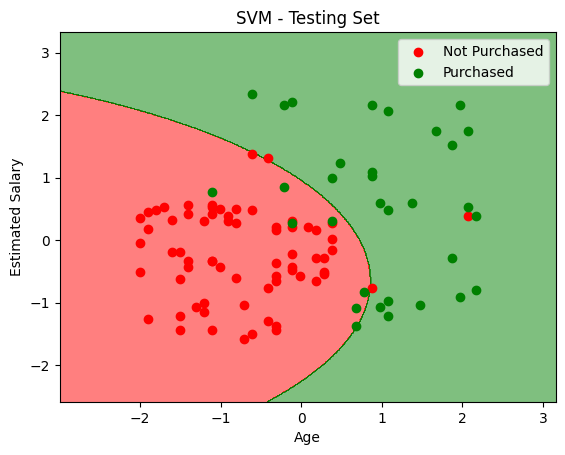

In [18]:


# Visualizing the Testing set results
from matplotlib.colors import ListedColormap

# Create a meshgrid of feature values
X1, X2 = np.meshgrid(np.arange(start = x_test[:, 0].min() - 1, stop = x_test[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_test[:, 1].min() - 1, stop = x_test[:, 1].max() + 1, step = 0.01))

# Use the trained classifier to make predictions on the meshgrid points
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Create a colormap for the two classes
cmap = ListedColormap(('red', 'green'))

# Plot the contour filled by the predictions
plt.contourf(X1, X2, Z, alpha = 0.5, cmap = cmap)

# Scatter plot the actual data points
plt.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], color = 'red', label = 'Not Purchased')
plt.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], color = 'green', label = 'Purchased')

# Add labels and legend
plt.title('SVM - Testing Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Show the plot
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
print ('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.9
